## Logistic Regression 에서 MLE에 대한 GD 구현

### Chain Rule 정리  

$ h = W_{1}X_{1} + W_{2}X_{2} + b  $  
$ p = \frac{1}{1 + exp(-h)}  $  
$ L^* =  \sum_{i}^{N}{t_{i} log(p) + (1-t_{i})log(1-p) } $  
$ J^* = - \sum_{i}^{N}{t_{i} log(p) + (1-t_{i})log(1-p) } $  

$ \frac{\partial{J^*}}{\partial{p}} = - \frac{1}{N} \sum_{i}^{N}{( \frac{t_i}{p_i} - \frac{1-t_i}{1-p_i} )} $  
$ \frac{\partial{p_i}}{\partial{h}} = p_i(1-p_i)$  
$ \frac{\partial{h}}{\partial{W_i}} = X_i $  
$ \frac{\partial{h}}{\partial{b}} = 1 $  
$ \frac{\partial{J^*}}{\partial{W}} = \frac{1}{N}\sum_{i}^{N}{X^T  (P - T)}$  
$ \frac{\partial{J^*}}{\partial{W_i}} = \frac{1}{N} \sum_{i}^{N}{ X_i^T  (P_i - T_i)} $

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [263]:
class Logistic:
    def __init__(self):
        
        self.params = {}
        self.params['W'] = 0.01 * np.random.randn(2, 1)
        self.params['b'] = np.ones(1)
    def forward(self, X):
        #Sigmoid 함수
        W = self.params['W']
        b = self.params['b']
        h = np.dot(X, W) + b
        p = 1 / (1 + np.exp(-h))
        
        return p
    
    def loss(self, X, T):
        
        p = self.forward(X)
        
        #Log_Likelihood
        L = np.dot(T.reshape(1,200), np.log(p)) + np.dot(1 - T.reshape(1,200), np.log(1 - p))
        L = np.squeeze(L)
        #for i in range(len(X)):
        #for문으로 각 데이터의 Log_Likelihood를 더해준다.
        #    L += ( T[i] * np.log(p[i]) + (1 - T[i]) * np.log(1 - p[i]) )
        
        #목적함수는 -Log_Likelihood
        return -L
    
    def accuracy(self, X, T):
        T_hat = np.round(self.forward(X)) #예측
        
        return (T_hat.reshape(-1) == T).sum()/len(T)
        
    def gradient(self, X, T, learning_rate = 0.0001):
        
        p = self.forward(X)
        #T = np.array(T)
        T = T.reshape(-1,1)
        #목적함수에 대한 가중치 미분값을 담을 zero array 생성
        grads = {}
        grads['W'] = np.zeros((2, 1))
        grads['b'] = np.zeros(1)
        #목적함수에 대한 가중치 미분값 합 구하기
        grads['W'] = (1/len(T)) * -np.dot(X.T, T-p)
        grads['b'] = (1/len(T)) * -np.sum((T - T*p) - (p - T*p))
#         for i in range(len(X)):
#             #for문으로 가중치에 대한 목적함수 미분 값 모두 더하기
#             grads['W'] -= ((T[i] * (1-p[i])) - ((1-T[i]) * p[i])) * X[i].reshape(2,1)
#             #print(i, ":  ", grads['W'])
#             grads['b'] -= ((T[i] * (1-p[i])) - ((1-T[i]) * p[i])) * 1
            
#             if i == len(X) - 1:
#                 grads['W'] /= len(X)
#                 grads['b'] /= len(X)
        self.params['W'] -= learning_rate * grads['W']
        self.params['b'] -= learning_rate * grads['b']

In [264]:
data = pd.read_csv("assignment_2.csv")
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [265]:
data.shape

(200, 4)

In [266]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\HoonCheol\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Experience')

Text(0,0.5,'Salary')

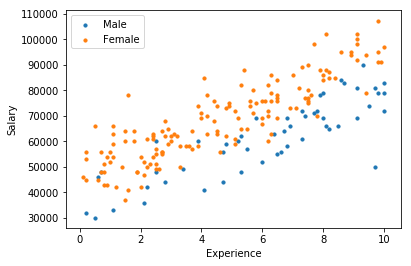

In [267]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [268]:
#데이터 간단 전처리
del data["bias"]
#salary 변수는 스케일링 해준다.
data["salary"] = 0.0001 * data["salary"]
# data["salary"] = (data["salary"] - data["salary"].mean()) / data["salary"].std()
# data["experience"] = (data["experience"] - data["experience"].mean()) / data["experience"].std()
#input으로 넣기 쉽게끔 array화
X = data[["experience", "salary"]].values
T = data["Label"].values

In [269]:
l = Logistic()

In [270]:
#l.forward(X)

In [271]:
l.loss(X, T)

217.98915302864629

In [272]:
history = {'acc': [],
           'loss': []}

In [273]:
for i in range(50000):
    if i % 10 == 0:
        history['acc'].append(l.accuracy(X, T))
        history['loss'].append(l.loss(X, T))
        
    if i % 1000 == 0:
        print(i, "번째 Accuracy : ", l.accuracy(X, T))
        print(i, "번째 Loss : ", l.loss(X, T))
    
    l.gradient(X, T)

0 번째 Accuracy :  0.26
0 번째 Loss :  217.98915302864629
1000 번째 Accuracy :  0.67
1000 번째 Loss :  125.79233114246247
2000 번째 Accuracy :  0.755
2000 번째 Loss :  118.89038721561056
3000 번째 Accuracy :  0.755
3000 번째 Loss :  115.00459496626843
4000 번째 Accuracy :  0.755
4000 번째 Loss :  111.64477840005213
5000 번째 Accuracy :  0.745
5000 번째 Loss :  108.64324575483195
6000 번째 Accuracy :  0.745
6000 번째 Loss :  105.95381183835339
7000 번째 Accuracy :  0.745
7000 번째 Loss :  103.5406037184205
8000 번째 Accuracy :  0.745
8000 번째 Loss :  101.37174989810413
9000 번째 Accuracy :  0.745
9000 번째 Loss :  99.41892386927333
10000 번째 Accuracy :  0.745
10000 번째 Loss :  97.65709825216746
11000 번째 Accuracy :  0.745
11000 번째 Loss :  96.06425625331958
12000 번째 Accuracy :  0.745
12000 번째 Loss :  94.62108420142658
13000 번째 Accuracy :  0.745
13000 번째 Loss :  93.31066753890023
14000 번째 Accuracy :  0.745
14000 번째 Loss :  92.11820343313224
15000 번째 Accuracy :  0.745
15000 번째 Loss :  91.03073696603693
16000 번째 Accuracy :  0.755
1

In [274]:
#최종 가중치 값 확인
l.params

{'W': array([[ 0.5873595],
        [-0.7861226]]), 'b': array([0.95225258])}

Text(0.5,0,'epochs')

Text(0,0.5,'Accuracy(%)')

Text(0,0.5,'Error')

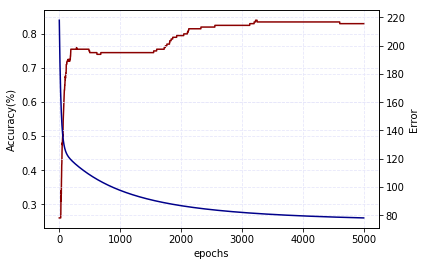

<Figure size 432x288 with 0 Axes>

In [275]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(5000), history['acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(5000), history['loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()
#plt.legend()
plt.savefig('acc.png')

In [276]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\HoonCheol\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Experience')

Text(0,0.5,'Salary')

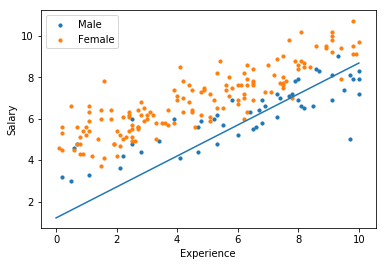

In [277]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 1], MALE.iloc[:, 2], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 1], FEMALE.iloc[:, 2], s=10, label='Female')

x_axis = np.linspace(0, 10,50)
y_axis = -(l.params['b'][0] + x_axis*l.params['W'][0]) / l.params['W'][1]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()